## Решение для хакатона ОЗОН

2017, Александр Дьяконов

In [2]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Droid Sans',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# data = pd.read_excel('Training Part.xlsx')
# day1 = pd.read_excel('day1.xlsx')
# day2 = pd.read_excel('day2.xlsx')

In [3]:
data = pd.read_csv('data.csv')
day1 = pd.read_csv('day1.csv')
day2 = pd.read_csv('day2.csv')

In [4]:
print (data.shape, day1.shape, day2.shape)

(390000, 197) (130000, 197) (132016, 197)


In [6]:
data[:5]

,ID,NetSales,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner
0,1,0.0,F,-,0.0,92,-,-,12,-,0.06667,0.33333,0.06667,0.01768,0.0,0.0,0.0,113,2623,2012-10-19 00:00:00,2008-01-20 00:00:00,-,-,-,-,-,51,108,2.0,0.0,2.0,0.0,0.0,0,-,0.0,0.0,-,-,-,14,-,1,15,-,-,1.0,0,1,-,0.0,0,4.0,4,1.0,-,-,0.0,-3.82756,-1.67380,-5.15525,-6.52538,113.0,-4.14635,-4.86583,0.0,0.0,0.0,9.0197,9.0197,-,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,0.0,F,-,0.0,-,-,-,-,-,0,0.33333,0.22222,-,0.0,0.0,0.0,79,-,2008-06-22 00:00:00,2008-06-22 00:00:00,-,-,-,-,-,103,103,1.0,1.0,0.0,0.0,0.0,0,-,0.0,0.0,-,-,-,8,-,8,8,-,-,0.0,-,4,-,1.0,-,0.0,-,0.0,-,-,0.0,-4.06040,-1.92671,-4.93723,-6.52939,110.0,-3.98769,-5.21042,0.0,0.0,0.0,8.59808,-,-,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-

In [7]:
day1[:5]

,ID,NetSales,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner
0,390004,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,390010,NaN,NaN,4.5,0.0,60,1,1,-,-,0.04138,0.18506,0.07356,0.14374,1.0,0.0,0.0,1,2261,2014-03-12 00:00:00,2009-06-30 00:00:00,0.95402,0.91429,0,0.59036,0,34,91,7.0,1.0,3.0,3.0,0.0,0.0,0,0.0,0.0,0,151,2,270,111,0,826,12,12,0.0,79,20,1,1.0,1,16.0,28,2.0,6,-,6.0,-1.90297,-1.72063,-3.57124,-5.03950,155.0,-2.39785

In [8]:
day2[:5]

,ID,Net Sales,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner
0,520001,NaN,M,0.9,0.0,78,1,2,0,0,0,0.24,0.12,0.00338,0.0,0.0,0.0,1,1478,2011-08-23 00:00:00,2008-12-25 00:00:00,0.75,1,0,0,0,65,97,2.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0,3,1,18,5,5,23,9,-,1.0,-,4,1,0.0,-,0.0,-,1.0,6,8,7.0,-4.07950,-2.42172,-4.79584,-6.03038,121.0,-3.95212,-4.19340,0.0,1.0,0.0,8.08853,-,5.42952,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.133333,0.0,0.0,0.000000,0.133333,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.133333,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.133333,0.0,0.000000,0.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.066667,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000,0.000000,0.0,0.0,0.066667,0.0,0.000000,0.0,0.2,15.0,0.0
1,520007,NaN,M,-,2.0,92,1,2,0,0,0.09053,0.39506,0.16049,0.33846,0.0,0.0,0.0,39,2288,2012-01-10 00:00:00,2009-03-02 00:00:00,0,0,0,0,0,60,94,3.0,1

### сделать признаковую матрицу

In [5]:
from time import time

def make_feature_matrix(data):
    tm = time()
    
    data.fillna(-2, inplace=True)
    data.replace('-', -1, inplace=True)
    data.gender = data.gender.map({'F': -1, 'M': +1, -2: 0})
    data.MaxRegDate = pd.to_datetime(data.MaxRegDate.replace(-1, datetime.datetime(2010, 6, 6, 0, 0)).replace(-2, datetime.datetime(2009, 7, 7, 0, 0)))
    data.MinRegDate = pd.to_datetime(data.MinRegDate.replace(-1, datetime.datetime(2010, 6, 6, 0, 0)).replace(-2, datetime.datetime(2009, 7, 7, 0, 0)))
    # print (tmp.max()) # Timestamp('2015-09-08 00:00:00') 2015-08-17 00:00:00
    # print (tmp.min()) # Timestamp('2006-03-06 00:00:00') 2006-03-04 00:00:00
    data['deltatime'] = data.MaxRegDate - data.MinRegDate
    data.deltatime = data.deltatime.dt.total_seconds() /(60*60*24)
    data.MaxRegDate = (data.MaxRegDate - pd.to_datetime('2006-01-01T00:00:00.000000000')).dt.total_seconds() /(60*60*24)
    data.MinRegDate = (data.MinRegDate - pd.to_datetime('2006-01-01T00:00:00.000000000')).dt.total_seconds() /(60*60*24)
    
    data = data.astype(float)
    
    print ('time = ' + str(time() - tm))
    return (data)

In [6]:
data = make_feature_matrix(data)
day1 = make_feature_matrix(day1)
day2 = make_feature_matrix(day2)

time = 6.3446221351623535
time = 2.0537281036376953
time = 2.0606093406677246


In [7]:
print (data.shape, day1.shape, day2.shape)

(390000, 198) (130000, 198) (132016, 198)


In [8]:
# подготовить матрицу для обучения
def make_trainmatrix(data):
    ids = data.ID.values
    if 'y' in data.columns:
        X = data.drop(['ID', 'NetSales', 'y'], axis=1)
    else:
        X = data.drop(['ID', 'NetSales'], axis=1)
    y = np.log(data.NetSales.values + 1.0)
    
    return (X, y, ids)

In [35]:
import scipy.stats as ss

    
# сделать ставки
def make_rates(a):
    v_sum = 2500000 # общее число денег
    k = 8 # число игроков
    n = len(a) # число юзеров
    b = np.linspace(0, 1, n)
    b = v_sum * k * b / np.sum(b)
    b = b[ss.rankdata(a, method='ordinal') - 1] #np.argsort(a)
    
    return (b)

In [10]:
import scipy.stats as ss

    
# сделать ставки - другая стратегия
def make_rates(a):
    v_sum = 2500000 # общее число денег
    k = 12 # число игроков
    n = len(a) # число юзеров
    b = np.linspace(-1, 1, n)
    b = np.maximum(b, 0)
    b = v_sum * k * b / np.sum(b)
    b = np.maximum(b, 1)
    b = b[ss.rankdata(a, method='ordinal') - 1] #np.argsort(a)
    #b = np.round(b, 2)
    
    return (b)

In [11]:
make_rates([1,2,10, 20, 30, 40])

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         3.33333333e+06,   1.00000000e+07,   1.66666667e+07])

In [12]:
tmp = day2.columns.tolist()
tmp[1] = 'NetSales' # там некорректность в значениях
day2.columns = tmp

X, y, data_ids = make_trainmatrix(data)
X1, y1, day1_ids = make_trainmatrix(day1)
X2, y2, day2_ids = make_trainmatrix(day2)

In [20]:
X[:5]

,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner,deltatime
0,-1.0,-1.00,0.0,92.0,-1.0,-1.0,12.0,-1.0,0.06667,0.33333,0.06667,0.01768,0.0,0.0,0.0,113.0,2623.0,2483.0,749.0,-1.00000,-1.0,-1.00000,-1.00000,-1.0,51.0,108.0,2.0,0.0,2.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,14.0,-1.0,1.0,15.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,0.0,0.0,4.0,4.0,1.0,-1.0,-1.0,0.0,-3.82756,-1.67380,-5.15525,-6.52538,113.0,-4.14635,-4.86583,0.0,0.0,0.0,9.01970,9.01970,-1.00000,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.00000,-2.0,-2.000000,-2.00000,-2.000000,-2.0,-2.0,-2.000000,-2.0,-2.00000,-2.000000,-2.000000,-2.000000,-2.0,-2.0,-2.00000,-2.0,-2.000000,-2.0,-2.0,-2.00000,-2.000000,-2.0,-2.0,-2.000000,-2.0,-2.000000,-2.000000,-2.00000,-2.000000,-2.00000,-2.0,-2.000000,-2.00000,-2.0,-2.0,-2.0,-2.000000,-2.000000,-2.0,-2.0,-2.000000,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.000000,-2.00000,-2.000000,-2.000000,-2.0,-2.00000,-2.0,-2.000000,-2.000000,-2.0,-2.0,-2.000000,-2.0,-2.000000,-2.0,-2.0,-2.000000,-2.000000,-2.0,-2.0,-2.00000,-2.00000,-2.000000,-2.00000,-2.0,-2.000000,-2.000000,-2.000000,-2.

In [21]:
X1[:5]

,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner,deltatime
0,-1.0,-2.00,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.00000,-2.00000,-2.00000,-2.00000,-2.0,-2.0,-2.0,-2.0,-2.0,1283.0,1283.0,-2.00000,-2.00000,-2.0,-2.00000,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.00000,-2.00000,-2.00000,-2.00000,-2.0,-2.00000,-2.00000,-2.0,-2.0,-2.0,-2.00000,-2.00000,-2.0000,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.000000,-2.0,-2.0000,-2.000000,-2.0000,-2.000000,-2.0,-2.000000,-2.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.0000,-2.0,-2.000000,-2.0,-2.000000,-2.0,-2.0000,-2.000000,-2.000000,-2.0000,-2.000000,-2.000000,-2.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.0,-2.0,-2.0,-2.0,-2.000000,-2.000000,-2.000000,-2.0,-2.000000,-2.000000,-2.0,-2.000000,-2.0,-2.000000,-2.000000,-2.0000,-2.000000,-2.000000,-2.000000,-2.000000,-2.0000,-2.000000,-2.000000,-2.0,-2.000000,-2.000000,-2.0000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000,
                            criterion='mse', max_depth=None,
                            min_samples_split=200, min_samples_leaf=100,
                            min_weight_fraction_leaf=0.0,
                            max_features=20, max_leaf_nodes=None,
                            min_impurity_split=1e-07, bootstrap=True,
                            oob_score=False, n_jobs=-1, random_state=10, # None
                            verbose=0, warm_start=False)

rf.fit(X, y)
a1_rf = rf.predict(X1)
a2_rf = rf.predict(X2)

In [11]:
from xgboost import XGBRegressor

#a1_gbm = 0
a2_gbm = 0

for t in range(10):
    gbm = XGBRegressor(max_depth=4, learning_rate=0.1,
                       n_estimators=100, silent=True,
                       objective='reg:linear', gamma=0.6,
                       min_child_weight=5, max_delta_step=0,
                       subsample=0.8, colsample_bytree=0.8,
                       colsample_bylevel=1, reg_alpha=0,
                       reg_lambda=1, scale_pos_weight=1, base_score=0.5,
                       seed=t, missing=None)
    gbm.fit(X, y)
    a1_gbm += gbm.predict(X1)
    a2_gbm += gbm.predict(X2)
    print (t)


#a1_gbm /= 5
a2_gbm /= 10

/home/alexander/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0
1
2
3
4
5
6
7
8
9


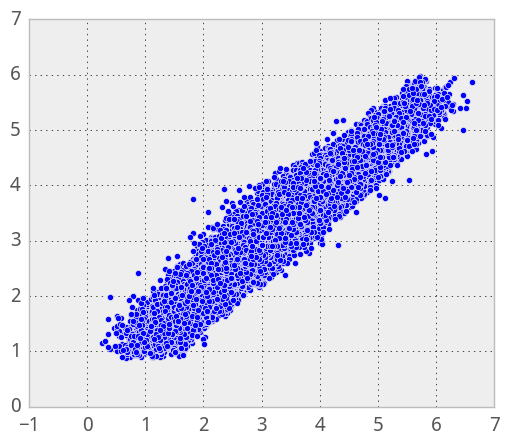

In [34]:
figsize(6, 5)
plt.scatter(a1_gbm, a1_rf)

In [24]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

lgbm = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1, seed=0)


lgbm.fit(X, y)

a1_lgbm = lgbm.predict(X1)
a2_lgbm = lgbm.predict(X2)

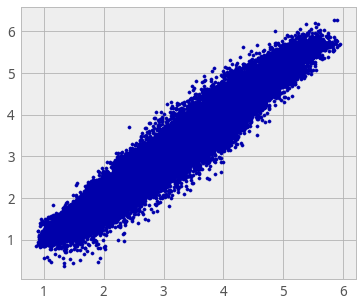

In [26]:
plt.scatter(a1_rf, a1_lgbm, 10, c ='#0000AA')

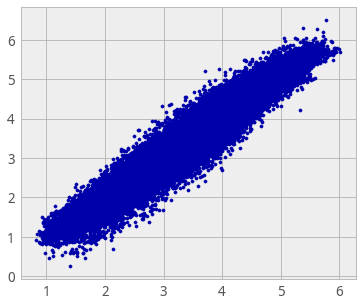

In [27]:
plt.scatter(a2_rf, a2_lgbm, 10, c ='#0000AA')

In [28]:
# a1 = 0.2 * a1_rf + 0.8 * a1_gbm
# a2 = 0.2 * a2_rf + 0.8 * a2_gbm


a1 = 0.2 * a1_rf + 0.8 * a1_lgbm
a2 = 0.2 * a2_rf + 0.8 * a2_lgbm

In [29]:
min(a1), max(a1), min(a1), max(a2)

(0.56006001304460185,
 6.1910533431351009,
 0.56006001304460185,
 6.3666864883953096)

In [30]:
max(np.exp(a2) - 1.0)

581.12574924935996

In [36]:
df1 = pd.DataFrame({'ID': day1_ids, 'NetSales_Forecast': ((np.exp(a1) - 1.0)), 'Bid': (make_rates(a1))})
# df1 = df1.astype(int)
df1.to_excel('ans_dyakonov_day1_post.xlsx', index=False, columns=['ID', 'NetSales_Forecast', 'Bid'])
df1[:5]

,Bid,ID,NetSales_Forecast
0,192.205029,390004.0,20.042152
1,9.543269,390010.0,3.507976
2,124.289713,390016.0,15.434077
3,256.170018,390022.0,36.039177
4,213.840698,390028.0,20.102014


In [37]:
df2 = pd.DataFrame({'ID': day2_ids, 'NetSales_Forecast': ((np.exp(a2) - 1.0)), 'Bid': (make_rates(a2))})
# df2 = df2.astype(int)
df2.to_excel('ans_dyakonov_day2_post.xlsx', index=False, columns=['ID', 'NetSales_Forecast', 'Bid'])
df2[:5]

,Bid,ID,NetSales_Forecast
0,123.600448,520001.0,15.652646
1,82.177669,520007.0,11.477249
2,72.586258,520013.0,10.330755
3,127.380551,520019.0,16.292125
4,220.999519,520025.0,22.989423


## Дальше проверка (для себя)

In [38]:
tmp1 = pd.read_excel('dyakonov_day1.xlsx')

In [39]:
tmp2 = pd.read_excel('dyakonov_day2.xlsx')

In [49]:
tmp2[:3]

,ID,NetSales_Forecast,Bid
0,520001,14,126
1,520007,12,101
2,520013,9,74


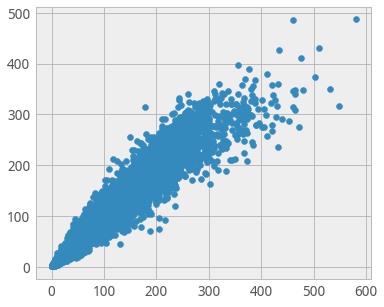

In [40]:
plt.scatter(tmp1.NetSales_Forecast, df1.NetSales_Forecast)

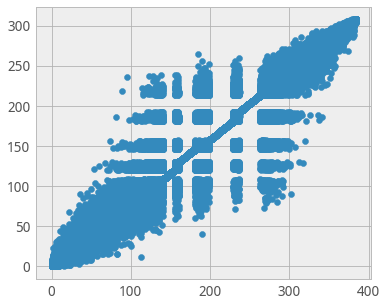

In [41]:
plt.scatter(tmp1.Bid, df1.Bid)

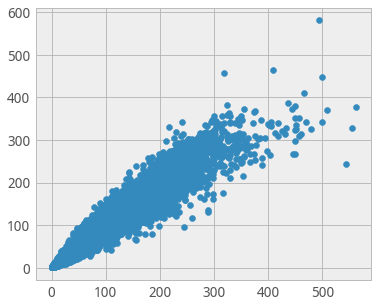

In [42]:
plt.scatter(tmp2.NetSales_Forecast, df2.NetSales_Forecast)

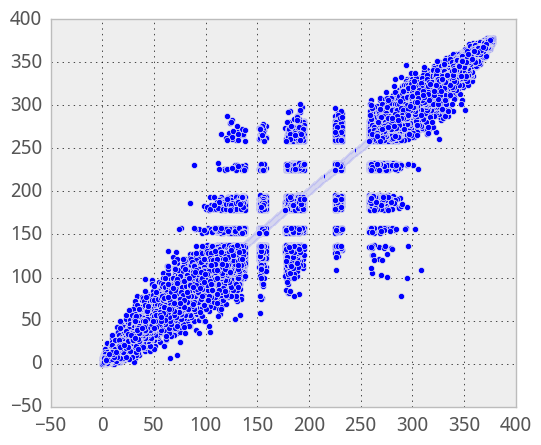

In [51]:
plt.scatter(tmp2.Bid, df2.Bid)

# проверка

In [10]:
def my_traintestsplit(X, y, p=0.25):
    n = X.shape[0]
    nn = int(np.round((1-p) * n))
    return (X[:nn], y[:nn], X[nn:], y[nn:])

X1, y1, X2, y2 = my_traintestsplit(X, y)
print (X.shape, X1.shape, X2.shape, y.shape, y1.shape, y2.shape)

(390000, 196) (292500, 196) (97500, 196) (390000,) (292500,) (97500,)


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,
                            criterion='mse', max_depth=None,
                            min_samples_split=200, min_samples_leaf=100,
                            min_weight_fraction_leaf=0.0,
                            max_features=20, max_leaf_nodes=None,
                            min_impurity_split=1e-07, bootstrap=True,
                            oob_score=False, n_jobs=-1, random_state=10, # None
                            verbose=0, warm_start=False)

rf.fit(X1, y1)
a_rf = rf.predict(X2)

In [12]:
from xgboost import XGBRegressor

a_gbm = 0


for t in range(5):
    gbm = XGBRegressor(max_depth=4, learning_rate=0.1,
                       n_estimators=100, silent=True,
                       objective='reg:linear', gamma=0.6,
                       min_child_weight=5, max_delta_step=0,
                       subsample=0.8, colsample_bytree=0.8,
                       colsample_bylevel=1, reg_alpha=0,
                       reg_lambda=1, scale_pos_weight=1, base_score=0.5,
                       seed=t, missing=None)
    gbm.fit(X1, y1)
    a_gbm += gbm.predict(X2)
    print (t)


a_gbm /= 5


/home/alexander/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0
1
2
3
4


In [13]:
a = 0.2 * a_rf + 0.8 * a_gbm

In [19]:
from scipy.integrate import trapz, simps

def hackathone_metric(df, do_draw=True):
    '''На фход подается словарь с ответами алгоритма(поле pred) 
    и фактическими значениями(поле test):
    df = {'pred': [2,3,55,63,1,2,100,100,10],'test': [1,2,3,4,5,0,99,121,14]}
    '''

    # Сортируем фактические продажи по возрастанию и считаем кумулятивную сумму – это нижняя линия
    n = range(1, len(df['test'])+1)
    c1 = np.cumsum(sorted(df['test'], reverse=False))

    # Сортируем фактические продажи по убыванию и считаем кумулятивную сумму – это верхняя линия
    c2 = np.cumsum(sorted(df['test'], reverse=True))

    # Площадь от верхней линии к нижней линии
    s1 = simps(c2, n) - simps(c1, n)

    # Теперь берём пары предсказаний и фактических продаж
    # Сортируем по возрастанию прогнозного значения
    c3 = np.cumsum(list(zip(*sorted(zip(df['pred'],df['test']), key=lambda x: x[0])))[1])
    s2 = simps(c3, n) -  simps(c1, n)
    
    if do_draw:
        plt.plot(n,c1, label='Lower Line')
        plt.plot(n,c2, label='Upper Line')
        plt.plot(n,c3, label='Actual Line')
        plt.legend()

    return (1-s2/s1)


# Проверка метрики - на вход подается полностью случайный прогноз
# Ожидается, что искомая линия пройдет посередине
figsize(6, 5)

df = {'pred': a,'test': y2}
print ("Metric: ", hackathone_metric(df))

NameError: name 'a' is not defined

Metric:  0.621995550395


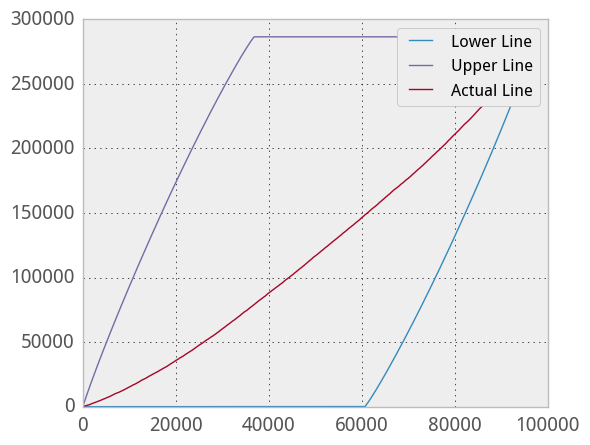

In [15]:
df = {'pred': (np.round(np.exp(a) - 1.0)),'test': y2}
print ("Metric: ", hackathone_metric(df))

0.0 0.620636518173
0.0526315789474 0.620832841581
0.105263157895 0.621046803985
0.157894736842 0.621295643409
0.210526315789 0.621516542351
0.263157894737 0.621659999279
0.315789473684 0.621783133362
0.368421052632 0.62191612081
0.421052631579 0.622068011626
0.473684210526 0.622145190819
0.526315789474 0.622153453196
0.578947368421 0.622204900991
0.631578947368 0.622256660367
0.684210526316 0.62218627885
0.736842105263 0.622107463885
0.789473684211 0.622116445131
0.842105263158 0.622126191117
0.894736842105 0.622081835009
0.947368421053 0.622031330678
1.0 0.621928255973


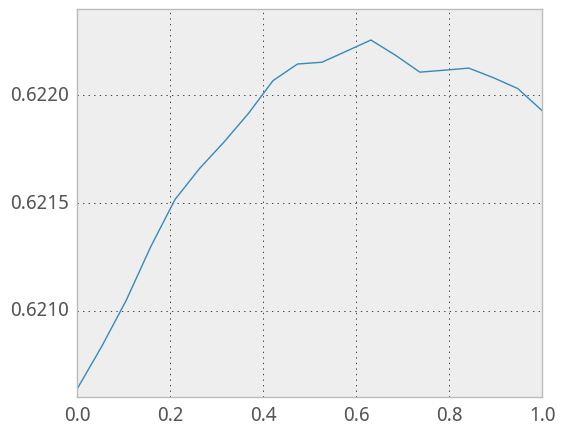

In [60]:
linsp = np.linspace(0, 1, 20)
e = []

for alpha in linsp:
    
    c = (alpha) * a_gbm + (1 - alpha) * a_rf
    df = {'pred': c,'test': y2}
    score = hackathone_metric(df, do_draw=False)
    e.append(score)
    print (alpha, score)
    
plt.plot(linsp, e)